# CIFAR-100 Deep Learning Project – Exploración de Datos
**Autor:** [Tu nombre]  
**Fecha:** [Fecha actual]  
**Objetivo:** Explorar y comprender el dataset CIFAR-100 como base para el desarrollo de un modelo de clasificación con deep learning.

---

## ✨ Objetivos específicos:
- Conocer la estructura y composición del dataset CIFAR-100.
- Visualizar imágenes representativas de las clases.
- Analizar la distribución de datos entre clases y subconjuntos.
- Preparar observaciones para el preprocesamiento.

## 🧰 1. Importaciones y configuración del entorno

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import cifar100
import random

# Configuración visual
plt.style.use('ggplot')
sns.set()


## 📦 2. Carga del dataset CIFAR-100

Cargaremos los datos utilizando la API de Keras, especificando `label_mode='fine'` para obtener las 100 clases detalladas.


In [8]:
# Cargamos el dataset CIFAR-100 con etiquetas "fine" (100 clases)
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

# Confirmamos las formas
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")


169001437/169001437 [==============================] - 16s 0us/step
x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


📌 *Observación:* El dataset CIFAR-100 contiene:
- 50,000 imágenes de entrenamiento
- 10,000 imágenes de prueba
- Cada imagen es de tamaño 32x32 píxeles a color (RGB)
- 100 clases distintas

## 🔍 3. Inspección de los datos

Vamos a revisar las dimensiones, tipos y estructura de los datos de entrenamiento y prueba.


In [9]:
# Dimensiones de los datos
print("Dimensiones del set de entrenamiento:", x_train.shape)
print("Dimensiones del set de prueba:", x_test.shape)

# Número de clases
num_classes = len(np.unique(y_train))
print("Número de clases:", num_classes)

# Verificamos valores únicos de etiquetas
print("Primeras 10 etiquetas (y_train):", y_train[:10].ravel())
print("Etiquetas únicas:", np.unique(y_train))


Dimensiones del set de entrenamiento: (50000, 32, 32, 3)
Dimensiones del set de prueba: (10000, 32, 32, 3)
Número de clases: 100
Primeras 10 etiquetas (y_train): [19 29  0 11  1 86 90 28 23 31]
Etiquetas únicas: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


- Cada imagen es de tamaño 32x32 píxeles con 3 canales de color (RGB).
- Hay 50,000 imágenes para entrenamiento y 10,000 para prueba.
- Las etiquetas van del 0 al 99 (100 clases).


## 🖼️ 4. Visualización de muestras del dataset

Veremos una muestra aleatoria de imágenes junto a sus etiquetas para tener una idea de la diversidad visual entre clases.


In [10]:
# Lista de nombres de las clases (fine labels)
fine_labels = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle',
    'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle',
    'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'computer_keyboard',
    'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain',
    'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree',
    'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket',
    'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider',
    'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor',
    'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm'
]

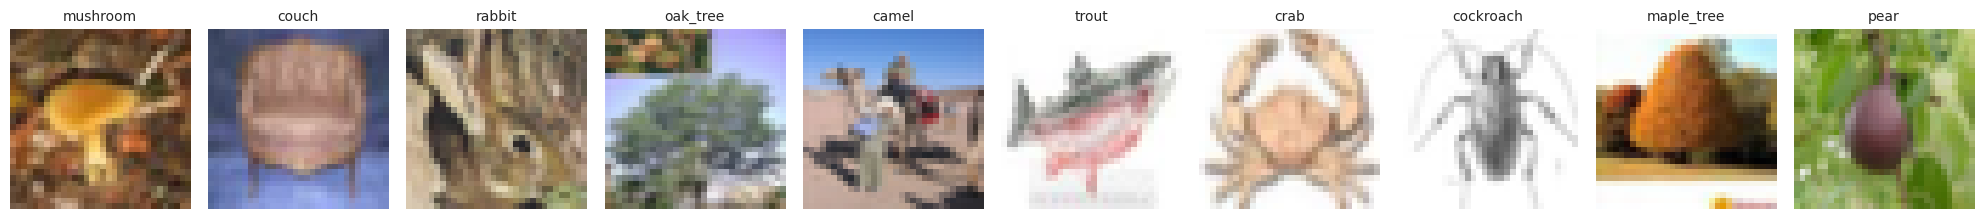

In [12]:
# Mostrar 10 imágenes aleatorias con sus etiquetas
fig, axes = plt.subplots(1, 10, figsize=(20, 3))
for i in range(10):
    index = random.randint(0, len(x_train) - 1)
    axes[i].imshow(x_train[index])
    label = y_train[index][0]
    axes[i].set_title(fine_labels[label], fontsize=10)
    axes[i].axis('off')

plt.tight_layout()
plt.show()


## 📊 5. Análisis de distribución de clases

Vamos a revisar cómo están distribuidas las clases (etiquetas) en los subconjuntos de entrenamiento y prueba.


In [13]:
# Contar frecuencia de cada etiqueta
unique, counts = np.unique(y_train, return_counts=True)

# Crear DataFrame con etiquetas y frecuencia
df_counts = pd.DataFrame({
    'Label ID': unique,
    'Label Name': [fine_labels[i] for i in unique],
    'Count': counts
})

# Ordenar por cantidad (opcional)
df_counts_sorted = df_counts.sort_values(by='Count', ascending=False)

# Mostrar primeras filas
df_counts_sorted.head()


,Label ID,Label Name,Count
0,0,apple,500
63,63,porcupine,500
73,73,shark,500
72,72,seal,500
71,71,sea,500


/tmp/ipykernel_20/3889877169.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_counts_sorted.head(30), x='Label Name', y='Count', palette='viridis')


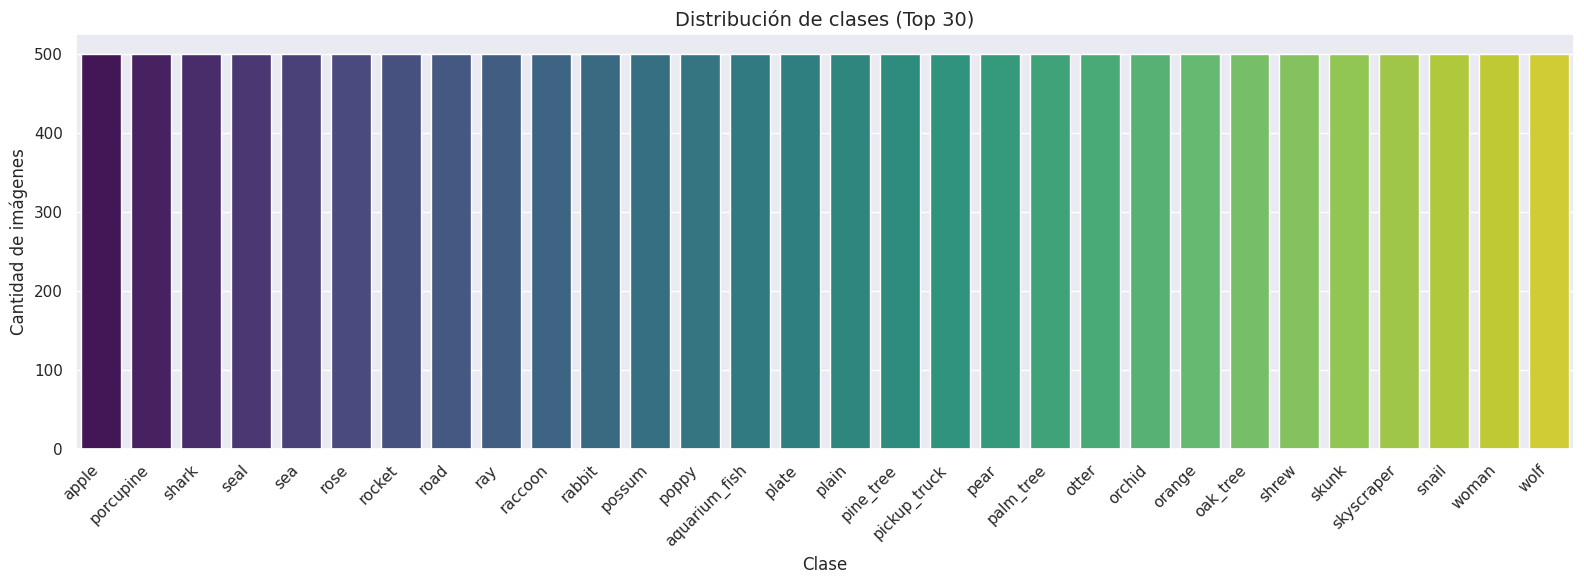

In [14]:
# Visualización de las 30 clases más frecuentes (aunque deberían ser iguales)
plt.figure(figsize=(16, 6))
sns.barplot(data=df_counts_sorted.head(30), x='Label Name', y='Count', palette='viridis')
plt.title('Distribución de clases (Top 30)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Cantidad de imágenes')
plt.xlabel('Clase')
plt.tight_layout()
plt.show()


## 🧠 6. Observaciones preliminares

Dejaremos algunas conclusiones clave y prepararemos el terreno para el preprocesamiento y construcción del modelo.


- El dataset CIFAR-100 contiene 100 clases balanceadas, cada una con 500 imágenes en el set de entrenamiento.
- Las imágenes tienen un tamaño de 32x32 píxeles y están en formato RGB.
- Las clases cubren una gran variedad de objetos, animales, plantas y estructuras artificiales.
- Se observa una alta diversidad visual, lo que plantea un desafío interesante para modelos de clasificación.


## 🔜 Próximos pasos

1. **Normalizar y preprocesar las imágenes** para mejorar el rendimiento del modelo.
2. **Codificar las etiquetas** (one-hot o sparse categorical).
3. Construir un **modelo base** de red neuronal convolucional (CNN).
4. Entrenar, evaluar y ajustar hiperparámetros.
5. Explorar **estrategias de mejora**: data augmentation, dropout, batch normalization, transfer learning.

El siguiente notebook será:  
📁 `02_modelo_basico_cnn.ipynb` – Construcción de un modelo inicial de clasificación con Keras.
